In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
data = {
    'Age': [25, 30, 35, 20, 45, 50, 40, 55, 60, 18],
    'Income': [40000, 60000, 80000, 20000, 100000, 120000, 90000, 150000, 180000, 15000],
    'Buy': [1, 1, 1, 0, 1, 1, 0, 0, 0, 0]  # 1 represents "buy," 0 represents "not buy"
}
df = pd.DataFrame(data)
print(df)

   Age  Income  Buy
0   25   40000    1
1   30   60000    1
2   35   80000    1
3   20   20000    0
4   45  100000    1
5   50  120000    1
6   40   90000    0
7   55  150000    0
8   60  180000    0
9   18   15000    0


In [4]:
X = df[['Age', 'Income']]
y = df['Buy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [6]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")


Accuracy: 1.0
Confusion Matrix:
[[1 0]
 [0 1]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [9]:
# #Root: 'age'
#    |
#    ├── 'age' <=30
#    |    |
#    |    ├── 'student'
#    |    |    |
#    |    |    ├── 'credit_rating'
#    |    |    |    |
#    |    |    |    ├── Buys Computer: 'no' (Leaf Node)
#    |    |    |    |
#    |    |    |    └── Buys Computer: 'yes' (Leaf Node)
#    |    |    |
#    |    |    └── Buys Computer: 'yes' (Leaf Node)
#    |    |
#    |    └── Buys Computer: 'no' (Leaf Node)
#    |
#    ├── 'age' >30 <=40
#    |    |
#    |    ├── 'credit_rating'
#    |    |    |
#    |    |    ├── Buys Computer: 'yes' (Leaf Node)
#    |    |    |
#    |    |    └── Buys Computer: 'yes' (Leaf Node)
#    |    |
#    |    └── 'income'
#    |         |
#    |         ├── Buys Computer: 'yes' (Leaf Node)
#    |         |
#    |         └── Buys Computer: 'no' (Leaf Node)
#    |
#    └── 'age' >40
#         |
#         ├── 'income'
#         |    |
#         |    ├── Buys Computer: 'yes' (Leaf Node)
#         |    |
#      |    └── Buys Computer: 'no' (Leaf Node)
#         |
#         └── Buys Computer: 'yes' (Leaf Node)
from sklearn.tree import DecisionTreeClassifier

# Create the DecisionTreeClassifier
model = DecisionTreeClassifier()

# Fit the model to the training data
model.fit(X_train, y_train)

# Calculate the training set accuracy
training_accuracy = model.score(X_train, y_train)
print("Training Set Accuracy:", training_accuracy)

# Get the depth of the decision tree
tree_depth = model.get_depth()
print("Tree Depth:", tree_depth)



Training Set Accuracy: 1.0
Tree Depth: 4


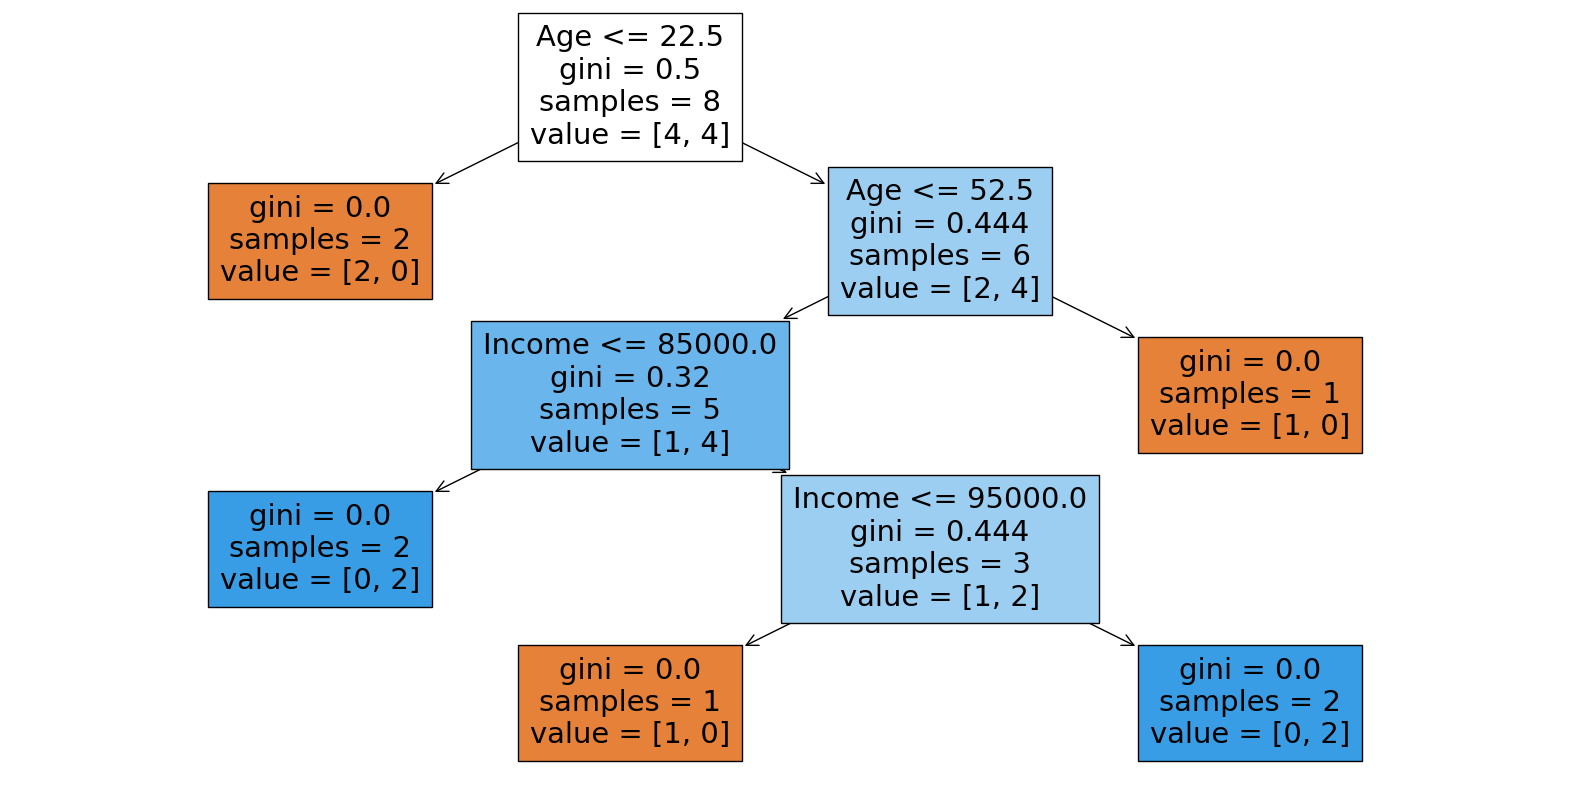

In [15]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Create the DecisionTreeClassifier and fit it to your data (if you haven't already)
# model = DecisionTreeClassifier()

feature_names = list(X_train.columns)

plt.figure(figsize=(20, 10))  # Adjust the figure size as needed

# Plot the decision tree
plot_tree(model, filled=True, feature_names=feature_names)

plt.show()


In [17]:
model = DecisionTreeClassifier()
model = model.fit(X_train,y_train)
model.score(X_train, y_train)#Training Set accuracy
model.score(X_train,y_train)#Test Set Accuracy

1.0